This is an unsupervised machine learning algorithm that is usually used for novelty and outlier detection. In this it is trained on normal data, during training it learns the boundary of normal data and classifies anything which is not inside the boundary as anomalous. This algorithm can be applied to high-dimensional data sets and there is no underlying assumption in the distribution of the data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [2]:
from sklearn.svm import OneClassSVM

In [3]:
data = pd.read_csv('/content/creditcard.csv')

In [4]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [6]:
data.drop(['Time'],inplace=True, axis=1)

In [7]:
# there is one row with an NA value. For simplicity ignoring that row
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25837 entries, 0 to 25836
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      25837 non-null  float64
 1   V2      25837 non-null  float64
 2   V3      25837 non-null  float64
 3   V4      25837 non-null  float64
 4   V5      25837 non-null  float64
 5   V6      25837 non-null  float64
 6   V7      25837 non-null  float64
 7   V8      25837 non-null  float64
 8   V9      25837 non-null  float64
 9   V10     25837 non-null  float64
 10  V11     25837 non-null  float64
 11  V12     25837 non-null  float64
 12  V13     25837 non-null  float64
 13  V14     25837 non-null  float64
 14  V15     25837 non-null  float64
 15  V16     25837 non-null  float64
 16  V17     25837 non-null  float64
 17  V18     25837 non-null  float64
 18  V19     25837 non-null  float64
 19  V20     25837 non-null  float64
 20  V21     25837 non-null  float64
 21  V22     25837 non-null  float64
 22

In [9]:
data['Class'].value_counts()

0.0    25749
1.0       88
Name: Class, dtype: int64

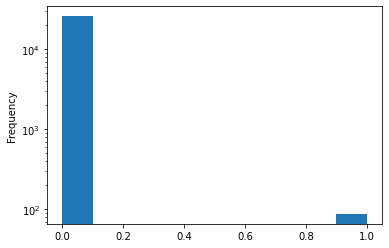

In [10]:
data['Class'].plot(kind = 'hist', logy=True)

In [11]:
#normalize X data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(data[data['Class'] == 0].drop(['Class'], axis=1))
normal_data_scaled = sc.transform(data[data['Class'] == 0].drop(['Class'], axis=1))
anamol_data_scaled = sc.transform(data[data['Class'] == 1].drop(['Class'], axis=1))

In [12]:
data_scaled = sc.transform(data.drop(['Class'], axis=1))

In [34]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma=0.01, nu=0.01)

clf.fit(normal_data_scaled)

OneClassSVM(gamma=0.01, nu=0.01)

In [35]:
anmol_pred = clf.predict(data_scaled)

In [39]:
data['pred'] = np.where(anmol_pred == 1, 0, 1)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(data['Class'], data['pred']))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     25749
         1.0       0.24      0.91      0.37        88

    accuracy                           0.99     25837
   macro avg       0.62      0.95      0.68     25837
weighted avg       1.00      0.99      0.99     25837

